<a href="https://colab.research.google.com/github/muski2504/smartphone_battery_degradation/blob/main/smartphone_battery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error #for checking model performance

In [2]:
from google.colab import files
uploaded = files.upload()

Saving smartphone_battery_degradation_data.csv to smartphone_battery_degradation_data.csv


In [3]:
df=pd.read_csv("smartphone_battery_degradation_data.csv")
df.head()

,age_months,charge_cycles,screen_time_hrs_day,fast_charge_percent,avg_temp_celsius,full_discharge_count,battery_health_percent
0,31,963,4.49,89,33.6,244,50.000000
1,17,842,4.04,11,35.7,52,59.930802
2,10,663,3.94,41,30.7,249,57.521745
3,23,1120,3.17,33,30.8,120,50.000000
4,21,195,5.54,21,32.8,258,62.955819


Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age_months              100 non-null    int64  
 1   charge_cycles           100 non-null    int64  
 2   screen_time_hrs_day     100 non-null    float64
 3   fast_charge_percent     100 non-null    int64  
 4   avg_temp_celsius        100 non-null    float64
 5   full_discharge_count    100 non-null    int64  
 6   battery_health_percent  100 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 5.6 KB
None
       age_months  charge_cycles  screen_time_hrs_day  fast_charge_percent  \
count  100.000000     100.000000           100.000000           100.000000   
mean    18.120000     648.460000             4.469100            46.720000   
std      9.186376     309.532082             1.314878            22.015183   
min      3.000000     101.000000             2.110000

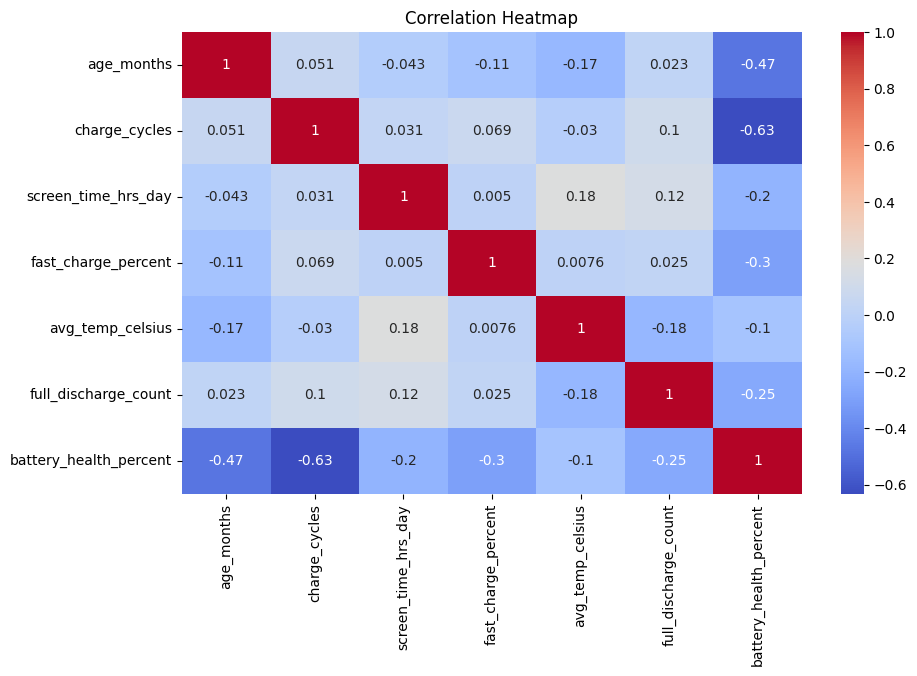

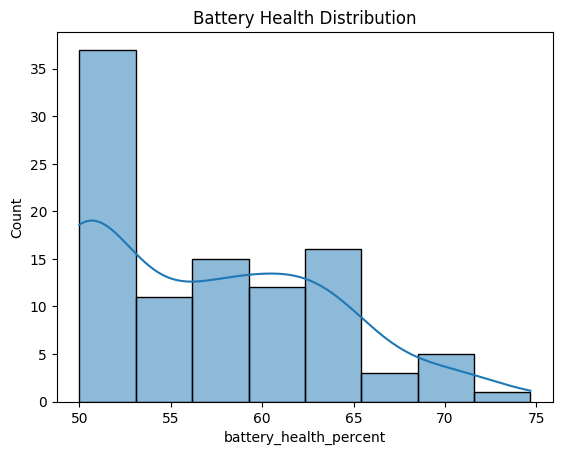

In [4]:
#info and stats
print(df.info()) #checks column types and missing data
print(df.describe()) #features

#check for missing values
print("Missing values:\n",df.isnull().sum())

#heatmap-> shows correlation btw features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")#correlation matrix, writes nos on heatmap,sets color style
plt.title("Correlation Heatmap")
plt.show()

#Distribution
sns.histplot(df["battery_health_percent"],kde=True)#kde adds smoothed curved on top
plt.title("Battery Health Distribution")
plt.show()

Model Training

In [5]:
#features and target
x=df.drop(columns='battery_health_percent')
y=df['battery_health_percent']

#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Evaluation

R^2 Score 0.8400857735838547
RMSE: 3.143632685445867


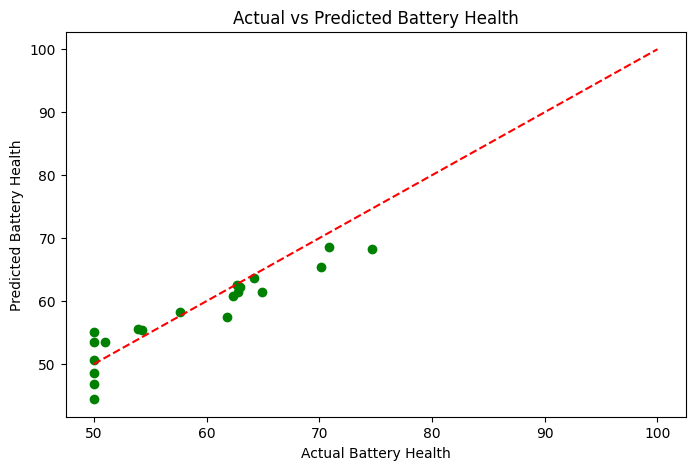

In [7]:
#predict
y_pred=model.predict(x_test)

#metrics
print("R^2 Score",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

#Plot
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred,color='green')
plt.xlabel("Actual Battery Health")
plt.ylabel("Predicted Battery Health")
plt.title("Actual vs Predicted Battery Health")
plt.plot([50,100],[50,100],'r--')
plt.show()

In [8]:
# Predict for new usage stats
sample_input = pd.DataFrame([{
    'age_months': 12,
    'charge_cycles': 400,
    'screen_time_hrs_day': 4.5,
    'fast_charge_percent': 50,
    'avg_temp_celsius': 34,
    'full_discharge_count': 90
}])

predicted_health = model.predict(sample_input)[0]
print("Predicted Battery Health: {:.2f}%".format(predicted_health)) #{} means instert the predicted_health value in that space followed by 2 decimal places


Predicted Battery Health: 62.77%
